In [ ]:
# https://icefree.tistory.com/entry/Spark-Window-10%EC%97%90-Spark%EC%84%A4%EC%B9%98

# 윈도우에서 스파크 설치.

#추천은 딱히...

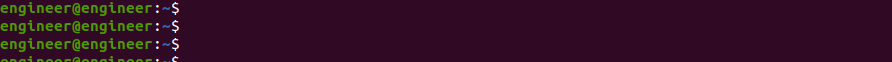

 - 이 뜻은  /home/engineer  (/home/계정이름)
 

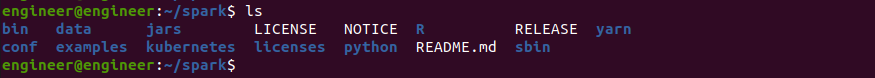

bin : # 실행파일
conf :
jars : 
python : 
R :
sbin :


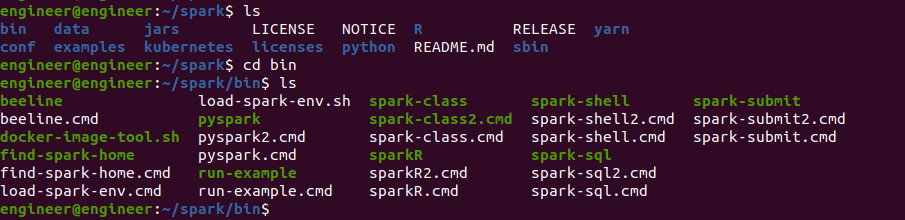


초록색이면  실행가능한 파일들  

ls -l 치면 

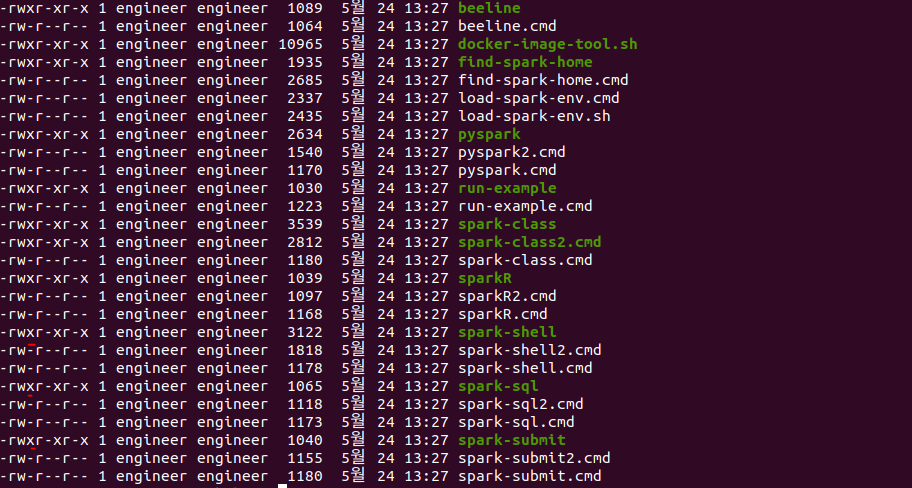

In [ ]:
pyspark     :스파크를 파이썬으로 실행하는 파일
spark-shell :스파크를 스칼라로 실행하는 파일
spark-submit:만들어저 잇는 파일 실행하는 파일  

In [ ]:
bin : 
conf : #설정 관련파일 
jars : 
python : 
R :
sbin : # 슈퍼빈, 시스템 관련 파일들

In [ ]:
##### master yarn #####
hdfs namenode -format
hdfs datanode - format

start-dfs.sh
start-yarn.sh

# start-all.sh
# stop-all.sh

jps  # 자바 관련 프로세스

hdfs dfsadmin -report  #하둡 실행이 잘되는지 확인 하고자 하는 파일
####################

pyspark


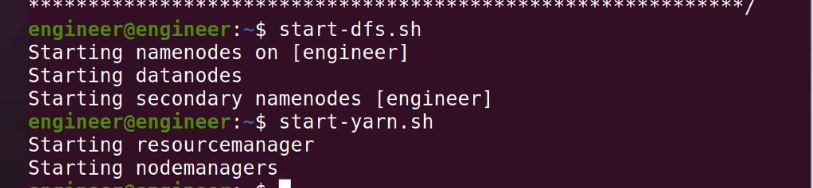

In [ ]:
#하둡계열이나 standalone로 우분투 보이면 파일 걍  드래그 해서.옮기기

# AWS
scp -i 키경로/데이터경로/data.zip 계정@ip:/home/계정/        
    
# 자기컴터 >cmd에서 실행해야됨
    

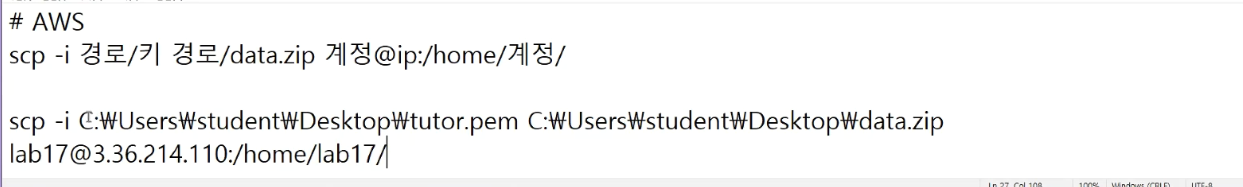


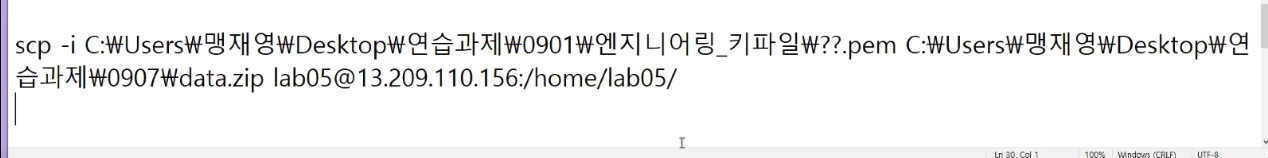


In [ ]:
scp -i C:\Users\Administrator\Desktop\study\key\de-c2.ppk C:\Users\Administrator\Desktop\data.zip lab06@3.34.168.105:/home/lab06/
# cmd창에 위  코드 입력하기            
# 윈도우 10부터 됩니다...            
# scp -i C:\Users\Administrator\Desktop\data.zip C:\Users\Administrator\Desktop\study\key\de-c2.ppk lab06@3.34.168.105:/home/lab06/
                       

In [ ]:
mkdir data # data 폴더 만들기
unzip data.zip -d ./data  #받은 data.zip파일을 풀어서 저장
cd data
cd 
vim wordcount.py

In [ ]:
#워드 카운트  파일만들어서 해당 코드 입력

import sys, re
from pyspark import SparkConf, SparkContext

conf = SparkConf().setAppName("Word Count")
sc = SparkContext(conf=conf)

if (len(sys.argv) != 3):
    print("wordcount.py input_file output_dir 형태로 실행해주세요!")
    sys.exit(0)
else:
    inputpath = sys.argv[1]
    outputpath = sys.argv[2]

wordcount = sc.textFile(inputpath)\
			  .repartition(10)\
    		  .filter(lambda x: len(x) > 0)\
        	  .flatMap(lambda x: re.split("\W+", x))\
              .filter(lambda x: len(x) > 0)\
              .map(lambda x: (x.lower(), 1))\
              .reduceByKey(lambda x, y: x + y)\
              .map(lambda x: (x[1], x[0]))\
              .sortByKey(ascending=False)\
              .persist()
 
wordcount.saveAsTextFile(outputpath)
top10 = wordcount.take(10)
result = []
for counts in top10:
    result.append(counts[1])
print(result)


In [ ]:
# standalone
mkdir result
spark-submit wordcount.py ./data/shakespeare.txt result
ls

# hadoop
cd data
hdfs dfs -put shakespeare.txt shakespeare.txt
cd
spark-submit wordcount.py shakespeare.txt result

